In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### First we need to reed the datasets.

In [2]:
df1 = pd.read_csv('Cab_Data.csv')
df1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [3]:
df2 = pd.read_csv('City.csv')
df2.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [4]:
df3 = pd.read_csv('Customer_ID.csv')
df3.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [5]:
df4 = pd.read_csv('Transaction_ID.csv')
df4.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


### Merging everything but with order

In [6]:
dfa = pd.merge(df3, df4)
dfa.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode
0,29290,Male,28,10813,10000011,Card
1,29290,Male,28,10813,10351127,Cash
2,29290,Male,28,10813,10412921,Card
3,27703,Male,27,9237,10000012,Card
4,27703,Male,27,9237,10320494,Card


In [7]:
dfb = pd.merge(df1, df4)
dfb.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card


In [8]:
new_df = pd.merge(dfa, dfb)
new_df.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,29290,Male,28,10813,10000011,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,29290,Male,28,10813,10351127,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228
2,29290,Male,28,10813,10412921,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020
3,27703,Male,27,9237,10000012,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
4,27703,Male,27,9237,10320494,Card,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192


In [9]:
df = pd.merge(new_df, df2)
df.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,29290,Male,28,10813,10000011,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701"
1,29290,Male,28,10813,10351127,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701"
2,29290,Male,28,10813,10412921,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701"
3,27703,Male,27,9237,10000012,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701"
4,27703,Male,27,9237,10320494,Card,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701"


In [10]:
df.shape

(359392, 14)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Customer ID         359392 non-null  int64  
 1   Gender              359392 non-null  object 
 2   Age                 359392 non-null  int64  
 3   Income (USD/Month)  359392 non-null  int64  
 4   Transaction ID      359392 non-null  int64  
 5   Payment_Mode        359392 non-null  object 
 6   Date of Travel      359392 non-null  int64  
 7   Company             359392 non-null  object 
 8   City                359392 non-null  object 
 9   KM Travelled        359392 non-null  float64
 10  Price Charged       359392 non-null  float64
 11  Cost of Trip        359392 non-null  float64
 12  Population          359392 non-null  object 
 13  Users               359392 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 41.1+ MB


### Some Statistics

In [12]:
df.describe()

,Customer ID,Age,Income (USD/Month),Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,19191.652115,35.336705,15048.822937,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,21012.412463,12.594234,7969.409482,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000000,18.000000,2000.000000,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,2705.000000,25.000000,8424.000000,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,7459.000000,33.000000,14685.000000,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,36078.000000,42.000000,21035.000000,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,60000.000000,65.000000,35000.000000,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


We look for null variables

In [13]:
df[df.isnull()].sum()

Customer ID           0.0
Gender                  0
Age                   0.0
Income (USD/Month)    0.0
Transaction ID        0.0
Payment_Mode            0
Date of Travel        0.0
Company                 0
City                    0
KM Travelled          0.0
Price Charged         0.0
Cost of Trip          0.0
Population              0
Users                   0
dtype: object

Looking for duplicated varables.

In [14]:
sum(df.duplicated())

0

### Splitting up Companies

#### Pink Cab Company

In [15]:
Pink_Cab = df[df['Company']=='Pink Cab']
Pink_Cab.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,29290,Male,28,10813,10000011,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701"
3,27703,Male,27,9237,10000012,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701"
6,27703,Male,27,9237,10395626,Card,43400,Pink Cab,ATLANTA GA,13.39,167.03,141.934,"814,885","24,701"
7,28712,Male,53,11242,10000013,Cash,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701"
11,28020,Male,23,23327,10000014,Cash,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701"


#### Yellow Cab Company

In [16]:
Yellow_Cab = df[df['Company']=='Yellow Cab']
Yellow_Cab.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
1,29290,Male,28,10813,10351127,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701"
2,29290,Male,28,10813,10412921,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701"
4,27703,Male,27,9237,10320494,Card,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701"
5,27703,Male,27,9237,10324737,Cash,43224,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,"814,885","24,701"
8,28712,Male,53,11242,10079404,Card,42634,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,"814,885","24,701"


### Analysis of the price charged by both companies in roder to see which charged less.

We also see the that the numbers of Users in Pink Cab Company are 84711 and for Yellow Company are the majority of Users, 274681.

In [17]:
Pink_price = (Pink_Cab['Price Charged']/Pink_Cab['KM Travelled'])
Pink_price.shape[0]

84711

In [18]:
Yellow_price = (Yellow_Cab['Price Charged']/Yellow_Cab['KM Travelled'])
Yellow_price.shape[0]

274681

### Distribution of the price for each company.

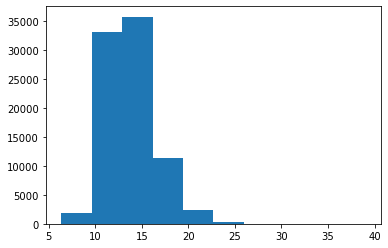

In [19]:
plt.hist(Pink_price);

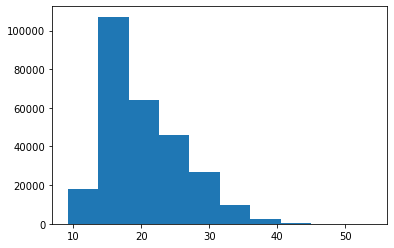

In [20]:
plt.hist(Yellow_price);

### One of the most important characteristic of this data is

Because of them we can see that Pink Cab company charged less than Yellow Cab company, this could be crusial for the investment in this company. 

In [21]:
Pink_price.mean()

13.768510007062694

In [22]:
Yellow_price.mean()

20.3060726817884

### Correlation between prices charged of Pink Cab and Yellow Cab companies.

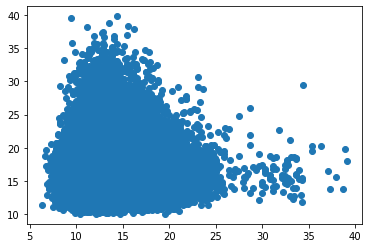

In [23]:
plt.scatter(Pink_price.head(84711), Yellow_price.head(84711))

In [24]:
#import seaborn as sn
#sn.pairplot(Yellow_Cab, kind='scatter')


In [25]:
#sn.pairplot(Pink_Cab, kind='scatter')

### Comparing the Payment Mode between both companies.

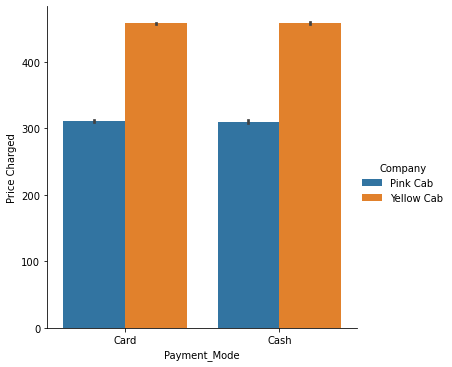

In [26]:
import seaborn as sns
sns.catplot(x="Payment_Mode", y="Price Charged", hue="Company", kind="bar", data=df);

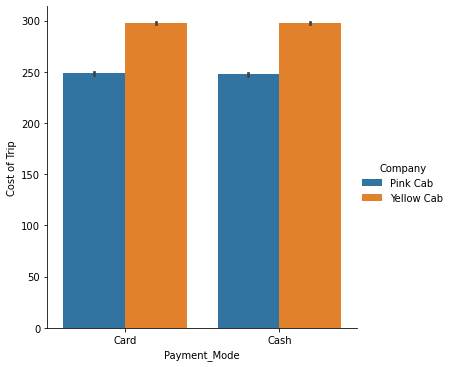

In [27]:
import seaborn as sns
sns.catplot(x="Payment_Mode", y="Cost of Trip", hue="Company", kind="bar", data=df);

We see that the companies have proportionally divided the number of card and cash when charged.

But we oberve that this is not the same tendency when each company charged, they have charged around 1.5 more by Card than is for Cash.

In [28]:
Yellow_Cab[Yellow_Cab['Payment_Mode']=='Card'].shape[0]/Yellow_Cab[Yellow_Cab['Payment_Mode']=='Cash'].shape[0]

1.4994631287762976

In [29]:
Pink_Cab[Pink_Cab['Payment_Mode']=='Card'].shape[0]/Pink_Cab[Pink_Cab['Payment_Mode']=='Cash'].shape[0]

1.4920863732642975

### Distribution between male and female

We see that both male and female have the same distribution from the point of view of the Price Charged for each company.

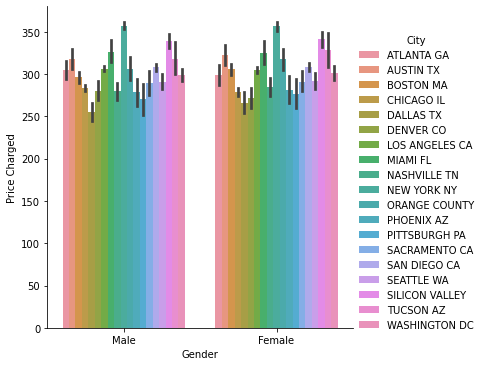

In [30]:
import seaborn as sns
sns.catplot(x="Gender", y="Price Charged", hue="City", kind="bar", data=Pink_Cab)

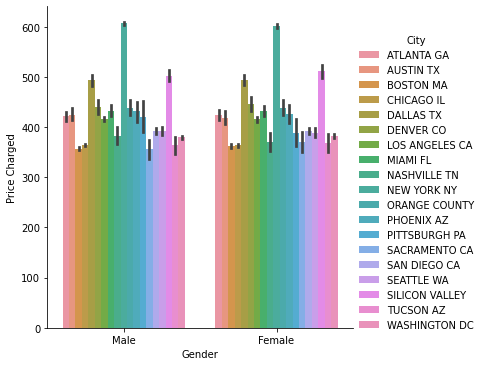

In [31]:
import seaborn as sns
sns.catplot(x="Gender", y="Price Charged", hue="City", kind="bar", data=Yellow_Cab)

Both male and female have same Income (USD/Month)

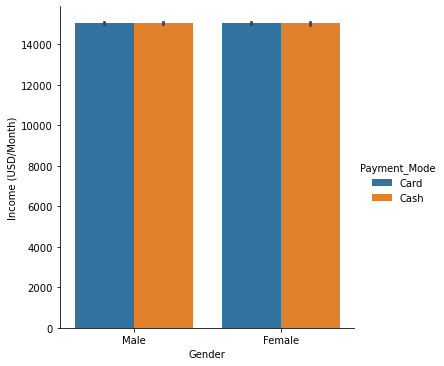

In [32]:
sns.catplot(x="Gender", y="Income (USD/Month)", hue="Payment_Mode", kind="bar", data=df)

The number of male and female in the dataset

In [33]:
male =  df['Gender']=='Male'
sum(male)

205912

In [34]:
female =  df['Gender']=='Female'
sum(female)

153480

## Making some numbers

#### 57.3% are male

In [35]:
sum(male)/new_df.shape[0]

0.572945418929748

#### 42.7% are female

In [36]:
sum(female)/new_df.shape[0]

0.42705458107025196

### The mean Price Charged for each company and for city

In [37]:
df.groupby(["City", "Company"])["Price Charged"].mean()

City            Company   
ATLANTA GA      Pink Cab      302.131555
                Yellow Cab    422.413446
AUSTIN TX       Pink Cab      320.435070
                Yellow Cab    422.248940
BOSTON MA       Pink Cab      300.551489
                Yellow Cab    359.140431
CHICAGO IL      Pink Cab      281.613731
                Yellow Cab    364.021927
DALLAS TX       Pink Cab      260.025652
                Yellow Cab    493.807790
DENVER CO       Pink Cab      276.202453
                Yellow Cab    443.235413
LOS ANGELES CA  Pink Cab      305.624252
                Yellow Cab    416.231136
MIAMI FL        Pink Cab      326.006309
                Yellow Cab    432.944872
NASHVILLE TN    Pink Cab      282.062493
                Yellow Cab    376.245577
NEW YORK NY     Pink Cab      357.074129
                Yellow Cab    604.841911
ORANGE COUNTY   Pink Cab      312.026874
                Yellow Cab    438.548623
PHOENIX AZ      Pink Cab      280.321458
                Yellow Cab    

### Lookin the Correlation between KM Travelled and Price Charge for each company.

Eventually this will make us to decide which of the companies are best for the XYZ firm to invest.

#### Pink Cab Company

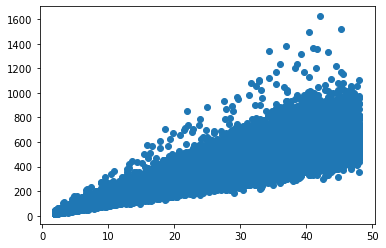

In [38]:
plt.scatter(Pink_Cab['KM Travelled'], Pink_Cab['Price Charged']);

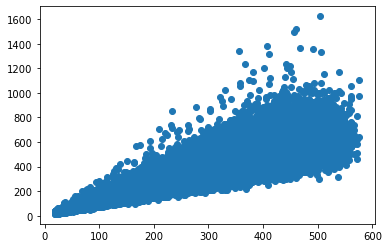

In [39]:
plt.scatter(Pink_Cab['Cost of Trip'], Pink_Cab['Price Charged']);

#### Yellow Cab Company

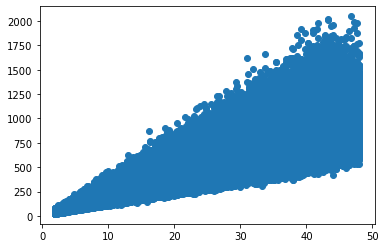

In [40]:
plt.scatter(Yellow_Cab['KM Travelled'], Yellow_Cab['Price Charged']);

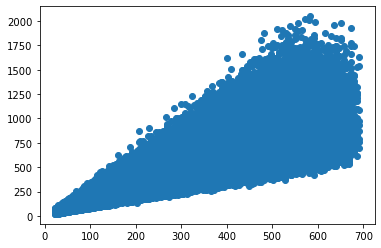

In [41]:
plt.scatter(Yellow_Cab['Cost of Trip'], Yellow_Cab['Price Charged']);

### Analysing each relation the  correlation coeffcient

In [42]:
import numpy as np
import pandas as pd

from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot

#### Asumming the distribution is normalized we use Pearson

In [43]:
Pink_Cab[["KM Travelled", "Price Charged", "Cost of Trip"]].corr(method='pearson')

,KM Travelled,Price Charged,Cost of Trip
KM Travelled,1.000000,0.927765,0.993367
Price Charged,0.927765,1.000000,0.921896
Cost of Trip,0.993367,0.921896,1.000000


In [44]:
Yellow_Cab[["KM Travelled", "Price Charged", "Cost of Trip"]].corr(method='pearson')

,KM Travelled,Price Charged,Cost of Trip
KM Travelled,1.000000,0.859709,0.993390
Price Charged,0.859709,1.000000,0.853996
Cost of Trip,0.993390,0.853996,1.000000


### When it is not assumed that data has normal distribution.

We can use both Spearman or Kendall.

#### Spearman correlation

In [45]:
Pink_Cab[["KM Travelled", "Price Charged", "Cost of Trip"]].corr(method='spearman')

,KM Travelled,Price Charged,Cost of Trip
KM Travelled,1.000000,0.951529,0.994437
Price Charged,0.951529,1.000000,0.947065
Cost of Trip,0.994437,0.947065,1.000000


In [46]:
Yellow_Cab[["KM Travelled", "Price Charged", "Cost of Trip"]].corr(method='spearman')

,KM Travelled,Price Charged,Cost of Trip
KM Travelled,1.000000,0.906669,0.994470
Price Charged,0.906669,1.000000,0.902565
Cost of Trip,0.994470,0.902565,1.000000


#### Kendall correlation

In [47]:
Pink_Cab[["KM Travelled", "Price Charged", "Cost of Trip"]].corr(method='kendall')

,KM Travelled,Price Charged,Cost of Trip
KM Travelled,1.000000,0.815367,0.937841
Price Charged,0.815367,1.000000,0.806019
Cost of Trip,0.937841,0.806019,1.000000


In [48]:
Yellow_Cab[["KM Travelled", "Price Charged", "Cost of Trip"]].corr(method='kendall')

,KM Travelled,Price Charged,Cost of Trip
KM Travelled,1.000000,0.738348,0.938016
Price Charged,0.738348,1.000000,0.731783
Cost of Trip,0.938016,0.731783,1.000000


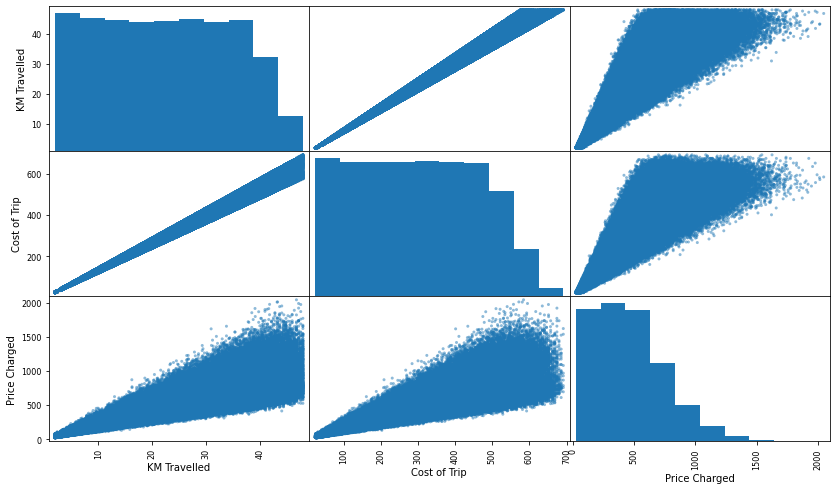

In [49]:
from pandas.plotting import scatter_matrix

scatter_matrix(Yellow_Cab[["KM Travelled", "Cost of Trip", "Price Charged"]], figsize = (14,8))
pyplot.show()

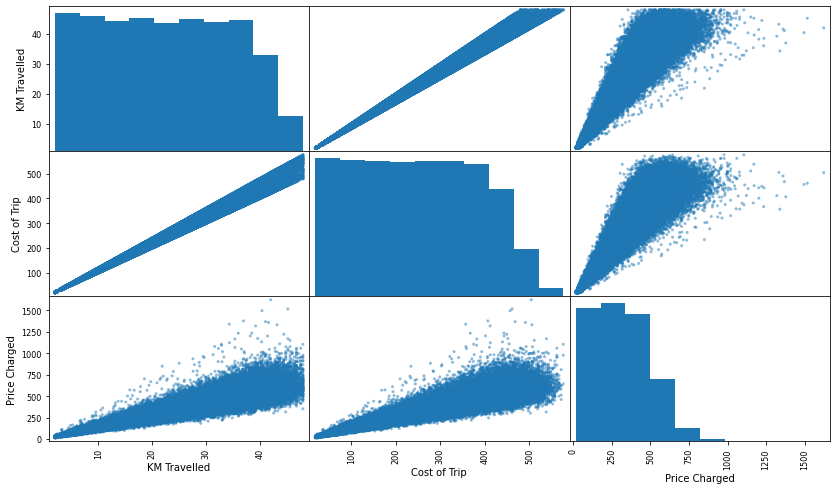

In [50]:
scatter_matrix(Pink_Cab[["KM Travelled", "Cost of Trip", "Price Charged"]], figsize = (14,8))
pyplot.show()

### Does margin proportionally increase with increase in number of customers?

As oberved in the scatter plots above the margin of Price Charged increase with the KM travelled and yes also with the users.

###  What are the attributes of these customer segments?



In [51]:
Pink_Cab[["KM Travelled", "Price Charged", "Cost of Trip", "Income (USD/Month)"]].corr(method='spearman')

,KM Travelled,Price Charged,Cost of Trip,Income (USD/Month)
KM Travelled,1.000000,0.951529,0.994437,0.000488
Price Charged,0.951529,1.000000,0.947065,0.002105
Cost of Trip,0.994437,0.947065,1.000000,0.000558
Income (USD/Month),0.000488,0.002105,0.000558,1.000000


This is interesting since the Income has positive correlation with Price Charged and Cost of Trip, which means this company has more earnings in the long run, people can travel and the Cost of Trip will always be affordable for people.

In [52]:
Yellow_Cab[["KM Travelled", "Price Charged", "Cost of Trip", "Income (USD/Month)"]].corr(method='spearman')

,KM Travelled,Price Charged,Cost of Trip,Income (USD/Month)
KM Travelled,1.000000,0.906669,0.994470,-0.000684
Price Charged,0.906669,1.000000,0.902565,0.003480
Cost of Trip,0.994470,0.902565,1.000000,-0.000662
Income (USD/Month),-0.000684,0.003480,-0.000662,1.000000


The Income has positive correlation with Price Charged and negative Cost of Trip, which means this company has no opportunity in the future because in time the Cost of Trip will not be affordable for people.

### What is the business problem?

We are trying to find out from the datasets (Cabs), which fo the two Companies is better to do an investment, so the XYZ firm in US, use that information to make a choice.

###  What are the properties of the data provided (data intake report)

The datasets provided are different parts of one main dataset, so the obvious thing to do is to merge them together.
Performing a scatter plot we can see that the only variables that matter for the analysis are KM Travelled, Cost of Trip, Price Charged.

The Yellow Cab Company has around 76% of the total users.

In [53]:
Yellow_Cab.shape[0]/df.shape[0]

0.764293584720862

So the remaining  24% of the total users is for the Pink Cab Company.

In [54]:
Pink_Cab.shape[0]/df.shape[0]

0.2357064152791381

### What steps did you take in order to create an applicable data set?

The steps to gain some inside from the data are the following:

* Merge all the datasets.
* To Perform a quick review of the dataset with seaborn.
* Look for correlation coeffcients among these variables KM Travelled, Cost of Trip, Price Charged.
* Show that that correlation is definite positive with the p_value.

### What type of analysis did you perform?

We looked for correlation among the variables, and see if they are related, in order to use that to make predictions, the other analysis would be to look for how much does the Users paid for their trips and comparing between the companies so we can see which one charged less.

###  What were the results?

The main results are

> Eventhough most of the users travelled with the Yellow Cab Company more than 70% in comparison with the Pink Cab Company. 


> We see clearly that the Pink Company charged price is less than the charged made by Yellow Cab Company.

> We strongly recommend XYZ firm to make an investment in the Pink Cab company, eventhoug has a minor users now, but in time it would have more users, because always people prefer to pay less and to get the place they want to get, and if they have options and one of them costs less, they would refer it.
